# <u>Drought Prediction</u>: Exploratory Data Analysis

The first step of any task is exploring the data that we have. We need to know the nature and distribution of the data at hand to apply the algorithm we think best suits the given data.

#### Import neccesary libraries for data exploration.

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000  # or 20000 if needed

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Load Training Dataset and Soil Dataset.  Convert Training Dataset date variable from object to datetime.

In [2]:
# Local location of the data
# local_data = 'D:\\Data_Science\\DroughtProject\\Data\\' # Location on Windows
local_data = '/Users/tanishalohchab/Downloads/drought_prediction-main/dataset/' # Location on Linux

# Load the training set and the soil variables.
soil_set = pd.read_csv(local_data + 'soil_data.csv')
train_set = pd.read_csv(local_data + 'train_timeseries.csv')

In [3]:
# Convert date column from object to datetime for training set.
train_set['date'] = pd.to_datetime(train_set['date'])

#### Confirm datasets are properly loaded and contain expected datatypes.

In [4]:
soil_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fips           3109 non-null   int64  
 1   lat            3109 non-null   float64
 2   lon            3109 non-null   float64
 3   elevation      3109 non-null   int64  
 4   slope1         3109 non-null   float64
 5   slope2         3109 non-null   float64
 6   slope3         3109 non-null   float64
 7   slope4         3109 non-null   float64
 8   slope5         3109 non-null   float64
 9   slope6         3109 non-null   float64
 10  slope7         3109 non-null   float64
 11  slope8         3109 non-null   float64
 12  aspectN        3109 non-null   float64
 13  aspectE        3109 non-null   float64
 14  aspectS        3109 non-null   float64
 15  aspectW        3109 non-null   float64
 16  aspectUnknown  3109 non-null   float64
 17  WAT_LAND       3109 non-null   float64
 18  NVG_LAND

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype         
---  ------       -----         
 0   fips         int64         
 1   date         datetime64[ns]
 2   PRECTOT      float64       
 3   PS           float64       
 4   QV2M         float64       
 5   T2M          float64       
 6   T2MDEW       float64       
 7   T2MWET       float64       
 8   T2M_MAX      float64       
 9   T2M_MIN      float64       
 10  T2M_RANGE    float64       
 11  TS           float64       
 12  WS10M        float64       
 13  WS10M_MAX    float64       
 14  WS10M_MIN    float64       
 15  WS10M_RANGE  float64       
 16  WS50M        float64       
 17  WS50M_MAX    float64       
 18  WS50M_MIN    float64       
 19  WS50M_RANGE  float64       
 20  score        float64       
dtypes: datetime64[ns](1), float64(19), int64(1)
memory usage: 3.0 GB


In [6]:
soil_set.head()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,...,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,...,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,...,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,...,1.891909,0.027488,1.919397,3,2,1,1,1,1,1


In [7]:
train_set.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


#### Initial exploration of Training dataset and consideration of correlated variables.

FIrst step of exploration is taking loook at teh corelation table as it tells us what factors of the dtaaset affect the target features the most and it also gives us the next steps for the preprocessing steps. 
To read a correlation table, look at the values in each cell, which represent the correlation coefficient (ranging from -1 to +1), indicating the strength and direction of the relationship between two variables. A positive value means variables move in the same direction, while a negative value means they move in opposite directions. 

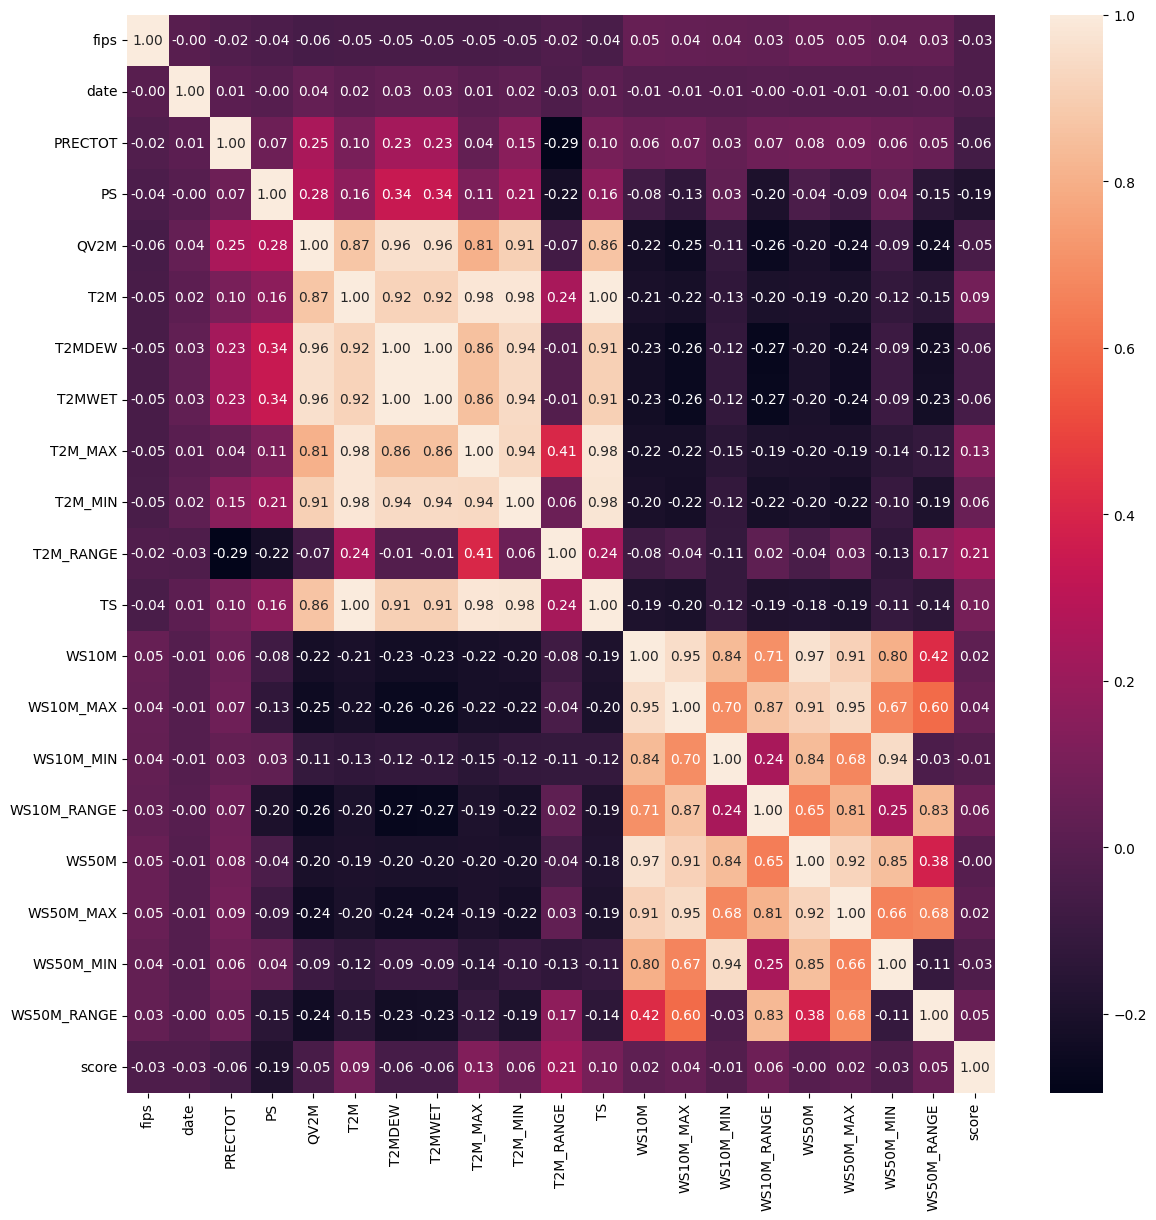

In [8]:
# Heatmap of correlation matrix for meteorological variables and drought score.
plt.subplots(figsize=(14,14))
sns.heatmap(train_set.corr(), annot=True, fmt='.2f');

The different temperature and humidity variables are highly correlated.  The wind variables are also highly correlated but less than might be expected.  The wind and temperature/humidity variables do not appear to have a strong correlation with each other. <br>

#### Initial exploration of how the data change over the timeseries.

<Axes: xlabel='Date', ylabel='Earth Skin Temperature (C)'>

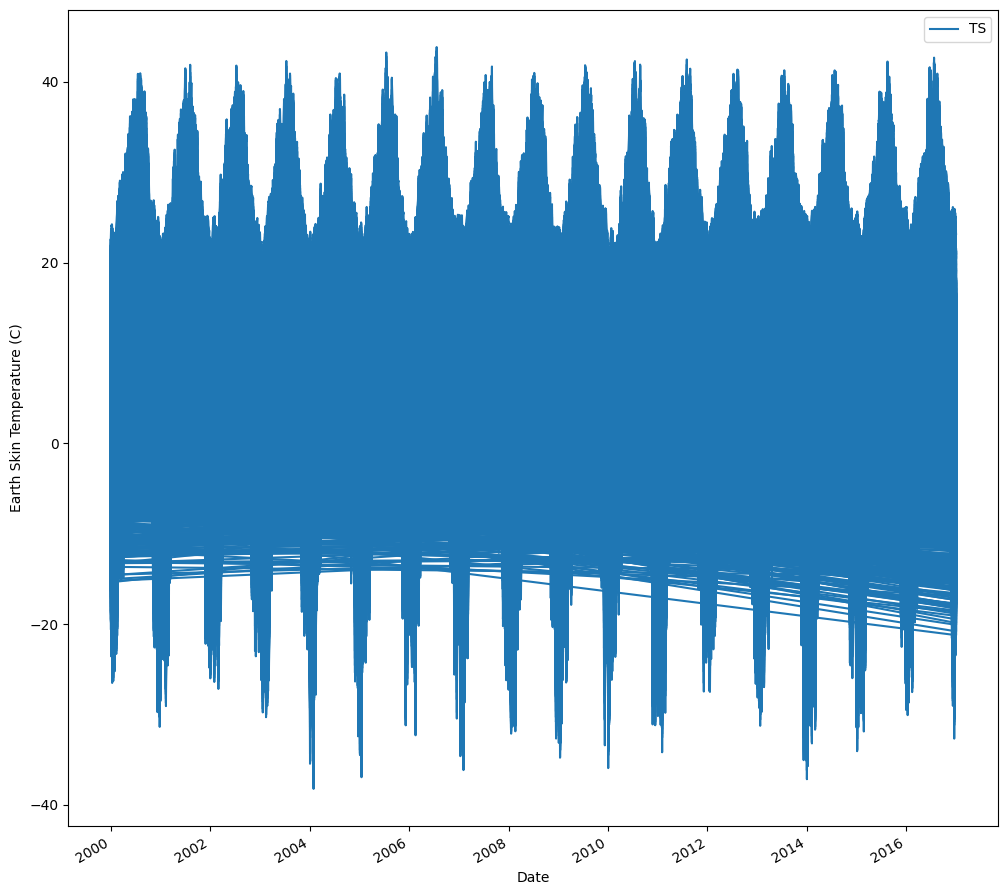

In [9]:
train_set.plot(x='date', y='TS', ylabel='Earth Skin Temperature (C)', xlabel='Date', figsize=(12,12))

In [10]:
train_set.TS.describe()

count    1.930068e+07
mean     1.288900e+01
std      1.114961e+01
min     -3.823000e+01
25%      4.340000e+00
50%      1.404000e+01
75%      2.207000e+01
max      4.385000e+01
Name: TS, dtype: float64

The TS (Earth Skin Temperature) is in Celsius.  The temperature appears to have an expected seasonal component.  The temperature range seems appropriate for North America.

#### One year temperature sample from one county in the training dataset.

<Axes: xlabel='Date', ylabel='Earth Skin Temperature (C)'>

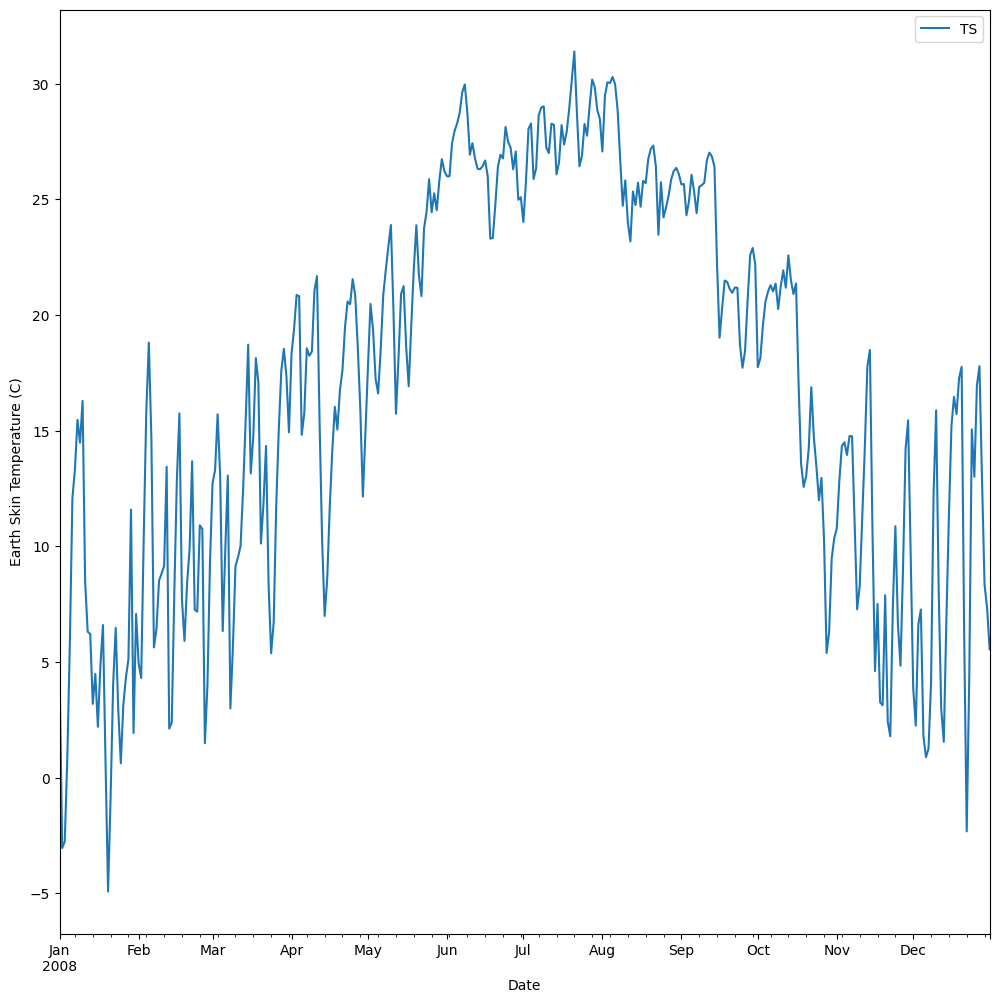

In [11]:
train_set[(train_set.fips == 1001) & (pd.DatetimeIndex(train_set['date']).year == 2008)].\
    plot(x='date', y='TS', ylabel='Earth Skin Temperature (C)', xlabel='Date', figsize=(12,12))

### Pairwise plot of the Training Dataset for the year 2008.


In [24]:
train_set_2008 = train_set[pd.DatetimeIndex(train_set['date']).year == 2008]

In [27]:
# **SEE:** `02b_Exploratory_Data_Analysis_pairplot` notebook
# sns.pairplot(train_set_2008)

### Exploration of Training Dataset with PCA.

In [12]:
train_set.columns

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')

In [13]:
features = ['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE']

# Separating out the features
x = train_set.loc[:, features].values

# Separating out the target
y = train_set.loc[:,['score']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [15]:
pca = PCA(n_components=12)
components = pca.fit(x)

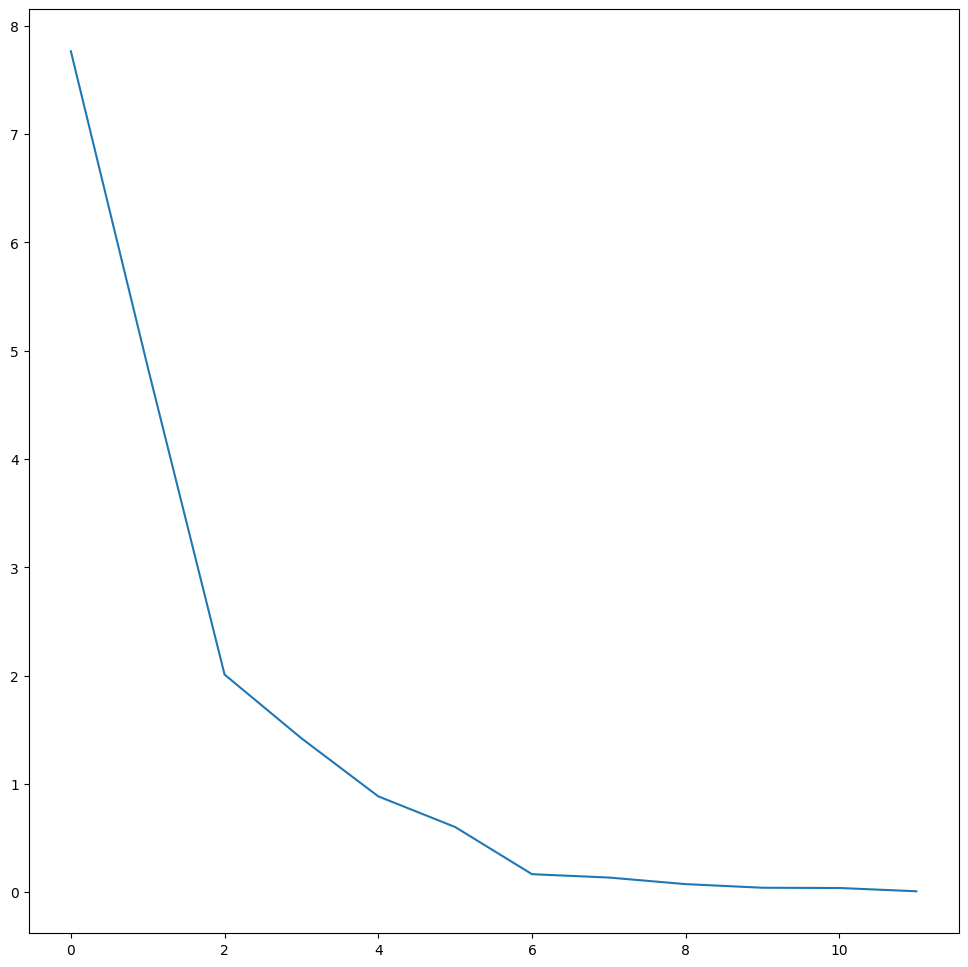

In [16]:
plt.subplots(figsize=(12,12))
plt.plot(components.explained_variance_)

Looking for the 'elbow' in the graph, there appears to be a turn at around 6 components. 

#### Initial exploration of Training dataset and consideration of correlated variables.

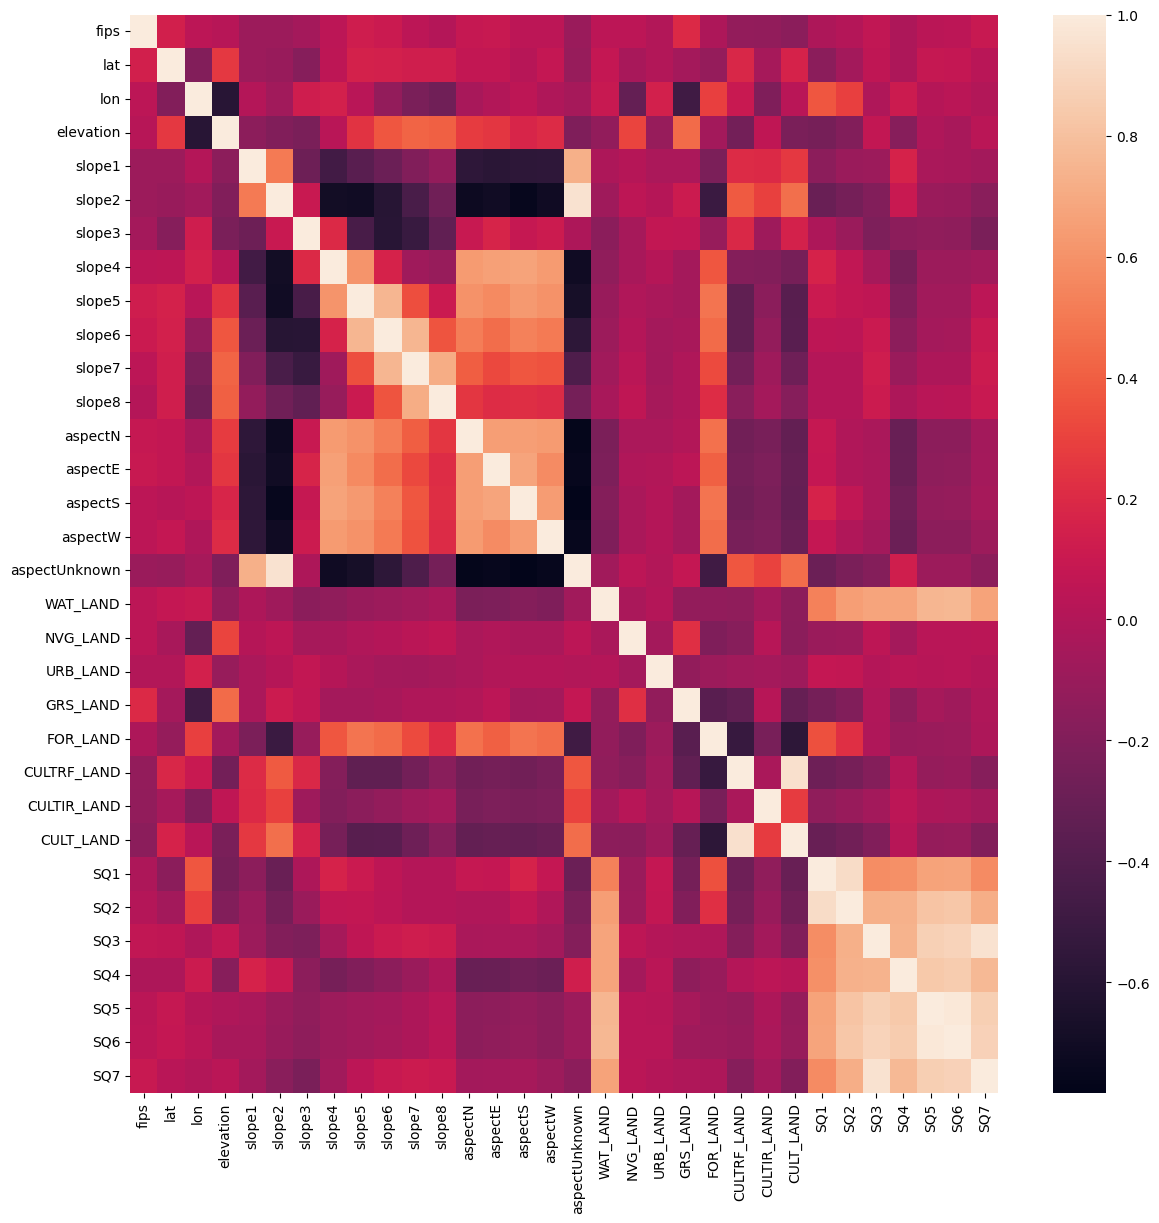

In [17]:
# Heatmap of correlation matrix for soil variables.
plt.subplots(figsize=(14,14))
sns.heatmap(soil_set.corr(), annot=False, fmt='.2f');

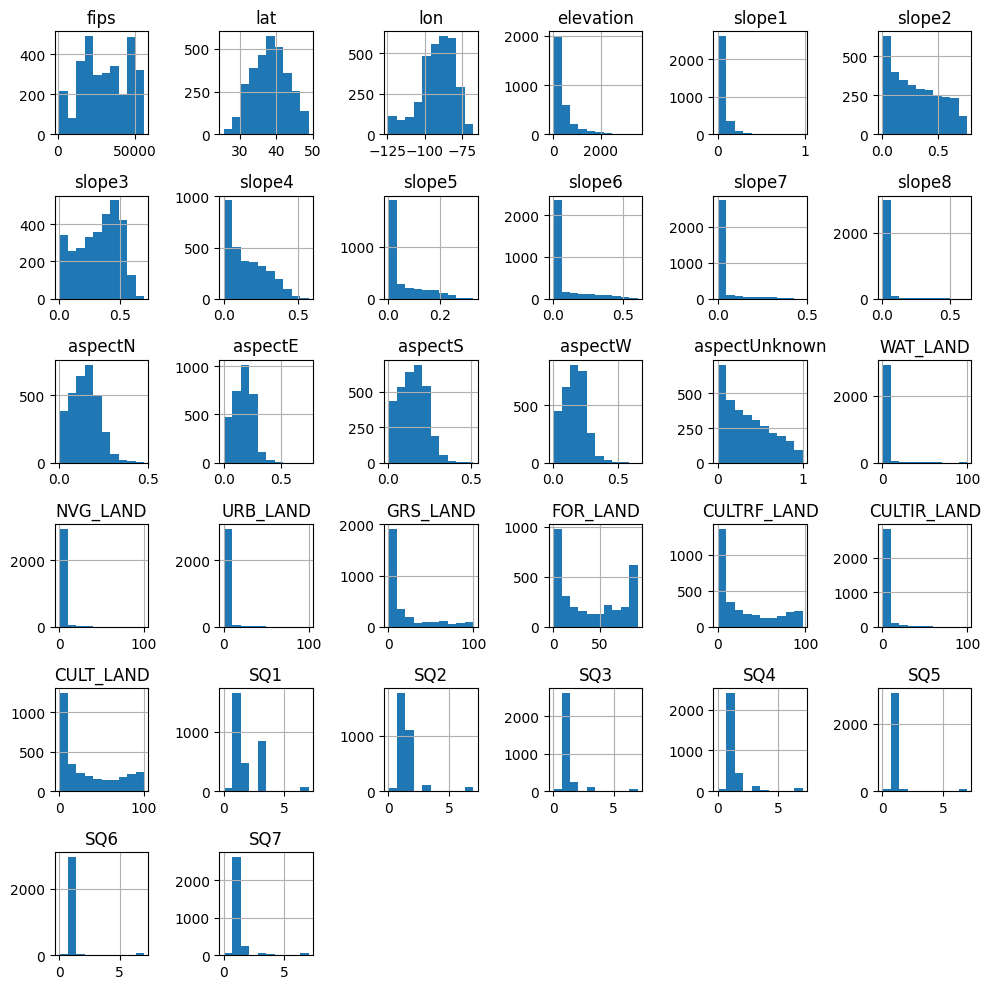

In [18]:
soil_set.hist(figsize=(10,10))
plt.tight_layout()

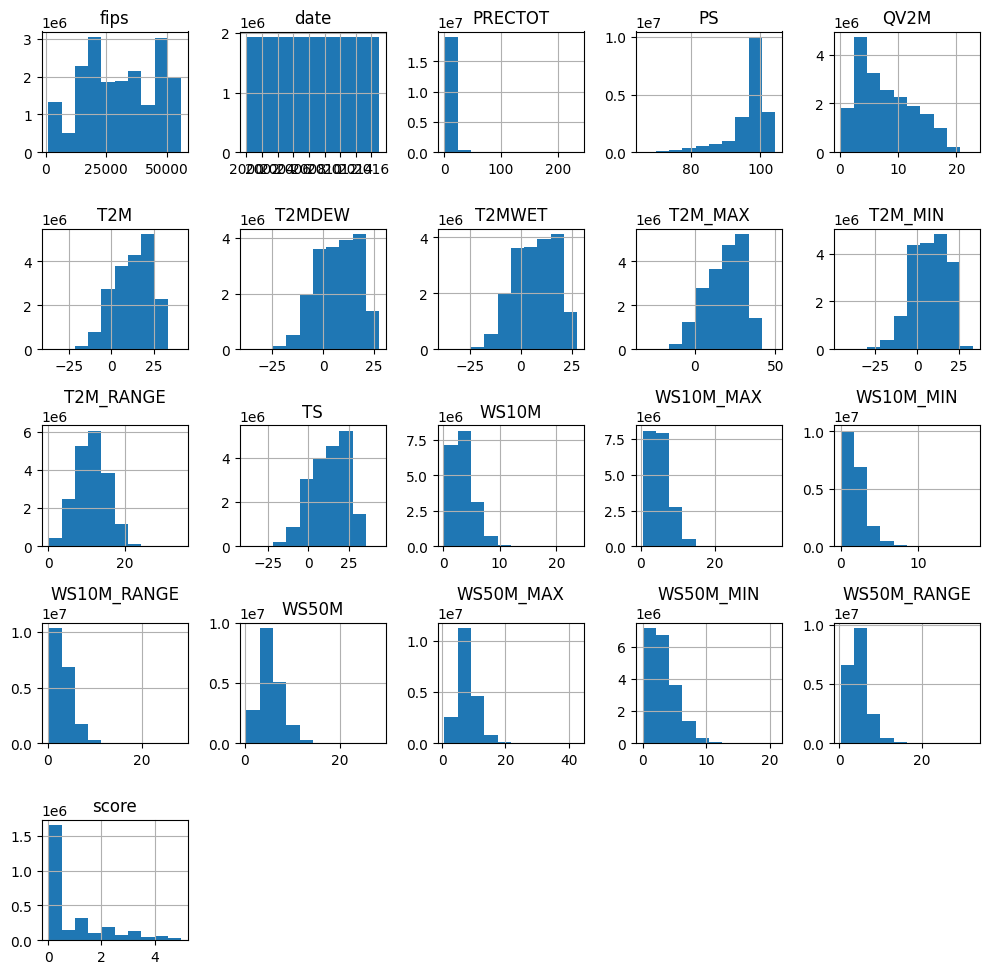

In [19]:
train_set.hist(figsize=(10,10))
plt.tight_layout()

# Determining Correlations greater than 0.92 for Feature Selection.

In [21]:
# Compute correlation matrix
corr_matrix = train_set.corr().abs()

# Select upper triangle of correlation matrix (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Extract highly correlated feature pairs (correlation > 0.92)
high_corr_features = [(column, idx, corr) 
                      for column in upper.columns 
                      for idx, corr in upper[column].items() 
                      if corr > 0.92]

# Display
for f1, f2, corr_val in sorted(high_corr_features, key=lambda x: -x[2]):
    print(f"{f1} ↔ {f2} → Correlation: {corr_val:.3f}")


T2MWET ↔ T2MDEW → Correlation: 1.000
TS ↔ T2M → Correlation: 0.998
T2M_MAX ↔ T2M → Correlation: 0.983
T2M_MIN ↔ T2M → Correlation: 0.982
TS ↔ T2M_MAX → Correlation: 0.980
TS ↔ T2M_MIN → Correlation: 0.979
WS50M ↔ WS10M → Correlation: 0.967
T2MWET ↔ QV2M → Correlation: 0.961
T2MDEW ↔ QV2M → Correlation: 0.960
WS10M_MAX ↔ WS10M → Correlation: 0.953
WS50M_MAX ↔ WS10M_MAX → Correlation: 0.948
WS50M_MIN ↔ WS10M_MIN → Correlation: 0.944
T2M_MIN ↔ T2MWET → Correlation: 0.941
T2M_MIN ↔ T2MDEW → Correlation: 0.940
T2M_MIN ↔ T2M_MAX → Correlation: 0.938
WS50M_MAX ↔ WS50M → Correlation: 0.921


In [24]:
train_set.corr()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
fips,1.000000e+00,-7.901079e-14,-0.017089,-0.035969,-0.055478,-0.048457,-0.050700,-0.050886,-0.050303,-0.046373,...,-0.044336,0.046493,0.041321,0.035296,0.031267,0.051473,0.053376,0.036962,0.034202,-0.030001
date,-7.901079e-14,1.000000e+00,0.009337,-0.001545,0.039324,0.015227,0.030586,0.030720,0.008665,0.021140,...,0.013971,-0.009726,-0.008068,-0.008753,-0.004814,-0.008669,-0.007278,-0.007077,-0.002673,-0.031484
PRECTOT,-1.708938e-02,9.336646e-03,1.000000,0.067633,0.249676,0.100949,0.234136,0.234132,0.036296,0.151195,...,0.097151,0.063153,0.072625,0.034942,0.073766,0.079093,0.087746,0.064506,0.052563,-0.064059
PS,-3.596858e-02,-1.545333e-03,0.067633,1.000000,0.278020,0.163697,0.338053,0.338135,0.112778,0.206536,...,0.163470,-0.076628,-0.131815,0.026716,-0.196463,-0.039484,-0.086798,0.038759,-0.152273,-0.185663
QV2M,-5.547757e-02,3.932359e-02,0.249676,0.278020,1.000000,0.872572,0.959707,0.960798,0.807513,0.907267,...,0.864949,-0.220085,-0.248944,-0.112763,-0.257725,-0.203760,-0.243984,-0.088115,-0.235367,-0.049752
T2M,-4.845652e-02,1.522723e-02,0.100949,0.163697,0.872572,1.000000,0.915029,0.915711,0.983352,0.981779,...,0.997505,-0.206279,-0.216074,-0.132319,-0.199782,-0.194210,-0.203542,-0.121098,-0.149828,0.088532
T2MDEW,-5.069979e-02,3.058604e-02,0.234136,0.338053,0.959707,0.915029,1.000000,0.999968,0.857073,0.940375,...,0.906728,-0.233570,-0.261717,-0.120140,-0.269843,-0.202789,-0.239970,-0.089294,-0.228925,-0.056618
T2MWET,-5.088639e-02,3.071971e-02,0.234132,0.338135,0.960798,0.915711,0.999968,1.000000,0.857745,0.941063,...,0.907454,-0.233197,-0.261304,-0.120055,-0.269344,-0.202672,-0.239790,-0.089339,-0.228644,-0.055894
T2M_MAX,-5.030339e-02,8.664763e-03,0.036296,0.112778,0.807513,0.983352,0.857073,0.857745,1.000000,0.938152,...,0.980068,-0.215848,-0.218225,-0.149195,-0.190969,-0.197144,-0.193713,-0.141922,-0.116516,0.126252
T2M_MIN,-4.637338e-02,2.114046e-02,0.151195,0.206536,0.907267,0.981779,0.940375,0.941063,0.938152,1.000000,...,0.979365,-0.204707,-0.221708,-0.119467,-0.216308,-0.198914,-0.222920,-0.104897,-0.191203,0.057611


In [25]:
train_set_correlated = ((train_set.corr() > 0.92) * train_set.corr())

In [26]:
np.round(train_set_correlated, 2)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
fips,1.0,-0.0,-0.0,-0.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,-0.0
date,-0.0,1.0,0.0,-0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,-0.0
PRECTOT,-0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,-0.0
PS,-0.0,-0.0,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.0,-0.00,-0.00,0.00,-0.0,-0.0
QV2M,-0.0,0.0,0.0,0.0,1.00,0.00,0.96,0.96,0.00,0.00,...,0.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,-0.0
T2M,-0.0,0.0,0.0,0.0,0.00,1.00,0.00,0.00,0.98,0.98,...,1.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,0.0
T2MDEW,-0.0,0.0,0.0,0.0,0.96,0.00,1.00,1.00,0.00,0.94,...,0.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,-0.0
T2MWET,-0.0,0.0,0.0,0.0,0.96,0.00,1.00,1.00,0.00,0.94,...,0.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,-0.0
T2M_MAX,-0.0,0.0,0.0,0.0,0.00,0.98,0.00,0.00,1.00,0.94,...,0.98,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,0.0
T2M_MIN,-0.0,0.0,0.0,0.0,0.00,0.98,0.94,0.94,0.94,1.00,...,0.98,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,0.0


In [27]:
soil_set_correlated = ((soil_set.corr() > 0.92) * soil_set.corr())

In [28]:
np.round(soil_set_correlated, 2)

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
fips,1.0,0.0,0.0,0.0,-0.0,-0.00,-0.0,0.0,0.0,0.0,...,-0.00,-0.0,-0.00,-0.00,0.00,0.00,-0.0,0.00,0.00,0.00
lat,0.0,1.0,-0.0,0.0,-0.0,-0.00,-0.0,0.0,0.0,0.0,...,0.00,-0.0,0.00,-0.00,-0.00,0.00,-0.0,0.00,0.00,0.00
lon,0.0,-0.0,1.0,-0.0,0.0,-0.00,0.0,0.0,0.0,-0.0,...,0.00,-0.0,0.00,0.00,0.00,-0.00,0.0,0.00,0.00,-0.00
elevation,0.0,0.0,-0.0,1.0,-0.0,-0.00,-0.0,0.0,0.0,0.0,...,-0.00,0.0,-0.00,-0.00,-0.00,0.00,-0.0,-0.00,-0.00,0.00
slope1,-0.0,-0.0,0.0,-0.0,1.0,0.00,-0.0,-0.0,-0.0,-0.0,...,0.00,0.0,0.00,-0.00,-0.00,-0.00,0.0,-0.00,-0.00,-0.00
slope2,-0.0,-0.0,-0.0,-0.0,0.0,1.00,0.0,-0.0,-0.0,-0.0,...,0.00,0.0,0.00,-0.00,-0.00,-0.00,0.0,-0.00,-0.00,-0.00
slope3,-0.0,-0.0,0.0,-0.0,-0.0,0.00,1.0,0.0,-0.0,-0.0,...,0.00,-0.0,0.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00
slope4,0.0,0.0,0.0,0.0,-0.0,-0.00,0.0,1.0,0.0,0.0,...,-0.00,-0.0,-0.00,0.00,0.00,-0.00,-0.0,-0.00,-0.00,-0.00
slope5,0.0,0.0,0.0,0.0,-0.0,-0.00,-0.0,0.0,1.0,0.0,...,-0.00,-0.0,-0.00,0.00,0.00,0.00,-0.0,-0.00,-0.00,0.00
slope6,0.0,0.0,-0.0,0.0,-0.0,-0.00,-0.0,0.0,0.0,1.0,...,-0.00,-0.0,-0.00,0.00,0.00,0.00,-0.0,-0.00,-0.00,0.00
